# Imports

In [12]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
import math

# Sierpiński gasket

*For more details, rules and analysis, please refer to [README](https://github.com/wielobel/Chaos-Game/blob/main/README.md)

##   1. Create initial points of the triangle <br>
    For simplicy and best effect let's go with the equilateral triangle 

In [13]:
def equilateral(sp: list, l: int) -> list:
    """
    Generate points of an equilateral triangle based on:
    sp: starting point
    l: desired side lenght
    """
    Ax = sp[0]
    Ay = sp[1]
    Bx = Ax + l
    By = Ay
    Cx = (Ax+Bx)/2
    Cy = math.sqrt(0.75*l**2) + Ay

    return([[Ax, Ay], [Bx, By], [Cx, Cy]])

(18.5, 51.5, 18.700961894323342, 47.27980021920982)

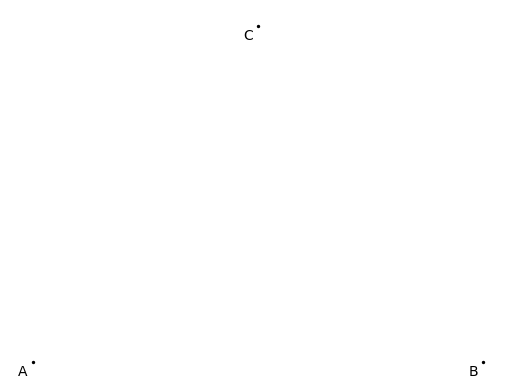

In [14]:
dt = equilateral([20,20],30)
df = pd.DataFrame(dt, columns = ['x', 'y'])
p = ['A', 'B', 'C']

fig, ax = plt.subplots(1)

ax.scatter(df.x, df.y, s=2, c = 'black', marker='o')
for i, x in enumerate(dt):
    ax.text(x[0]-1, x[1]-1, p[i])

ax.axis('off')

### Our starting points:

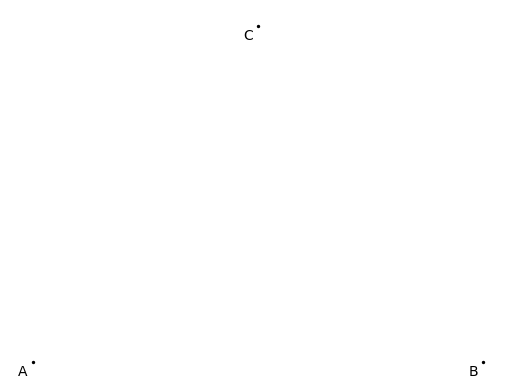

In [15]:
display(fig)

##   2. Generate points accoring to the chaos game rules <br>
    Starting in the point A (again, for simplicity)

In [16]:
# Create new list based on the original one
# We are going to add new random points to it
dt_add = dt.copy()

# starting in point A
position = dt[0]

# generating points
for i in range(1,10000):
    x = random.randint(0,2)
    goingto = dt[x]

    x = (goingto[0]+position[0])/2
    y = (goingto[1]+position[1])/2

    new_point = [x,y]
    position = [x,y]

    dt_add.append(new_point)


df_add = pd.DataFrame(dt_add, columns = ['x', 'y'])

##   3. Create a gif that will show gradual generation of the triangle <br>
    since we are woring with 10k points of data, one frame of the gif will
    be created for 50 new/additonal points. The gif itslef will be in 60 fps,
    so each second 300 new points will appear.

In [17]:

gif_name = 'triangle'
print('building plots\n')
plots = []

for i in range (1,10000,50):
    dt_temp = dt_add[0:i]    
    df_temp = pd.DataFrame(dt_temp, columns = ['x', 'y'])
    plt.scatter(df_temp.x, df_temp.y, s=0.4, c = 'black', marker='o', \
        edgecolors='none')

    plot = f'temp/frame_{i}.png'
    plots.append(plot)

    plt.axis('off')
    plt.savefig(plot)
    plt.close()

# Build GIF
print('creating gif\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I',fps=60) as writer:
    for plot in plots:
        image = imageio.imread(plot)
        writer.append_data(image)
print('gif complete\n')
print('Removing Images\n')
# Remove files
for plot in set(plots):
    os.remove(plot)
print('done')

building plots

creating gif

gif complete

Removing Images

done


## 4. Final Result

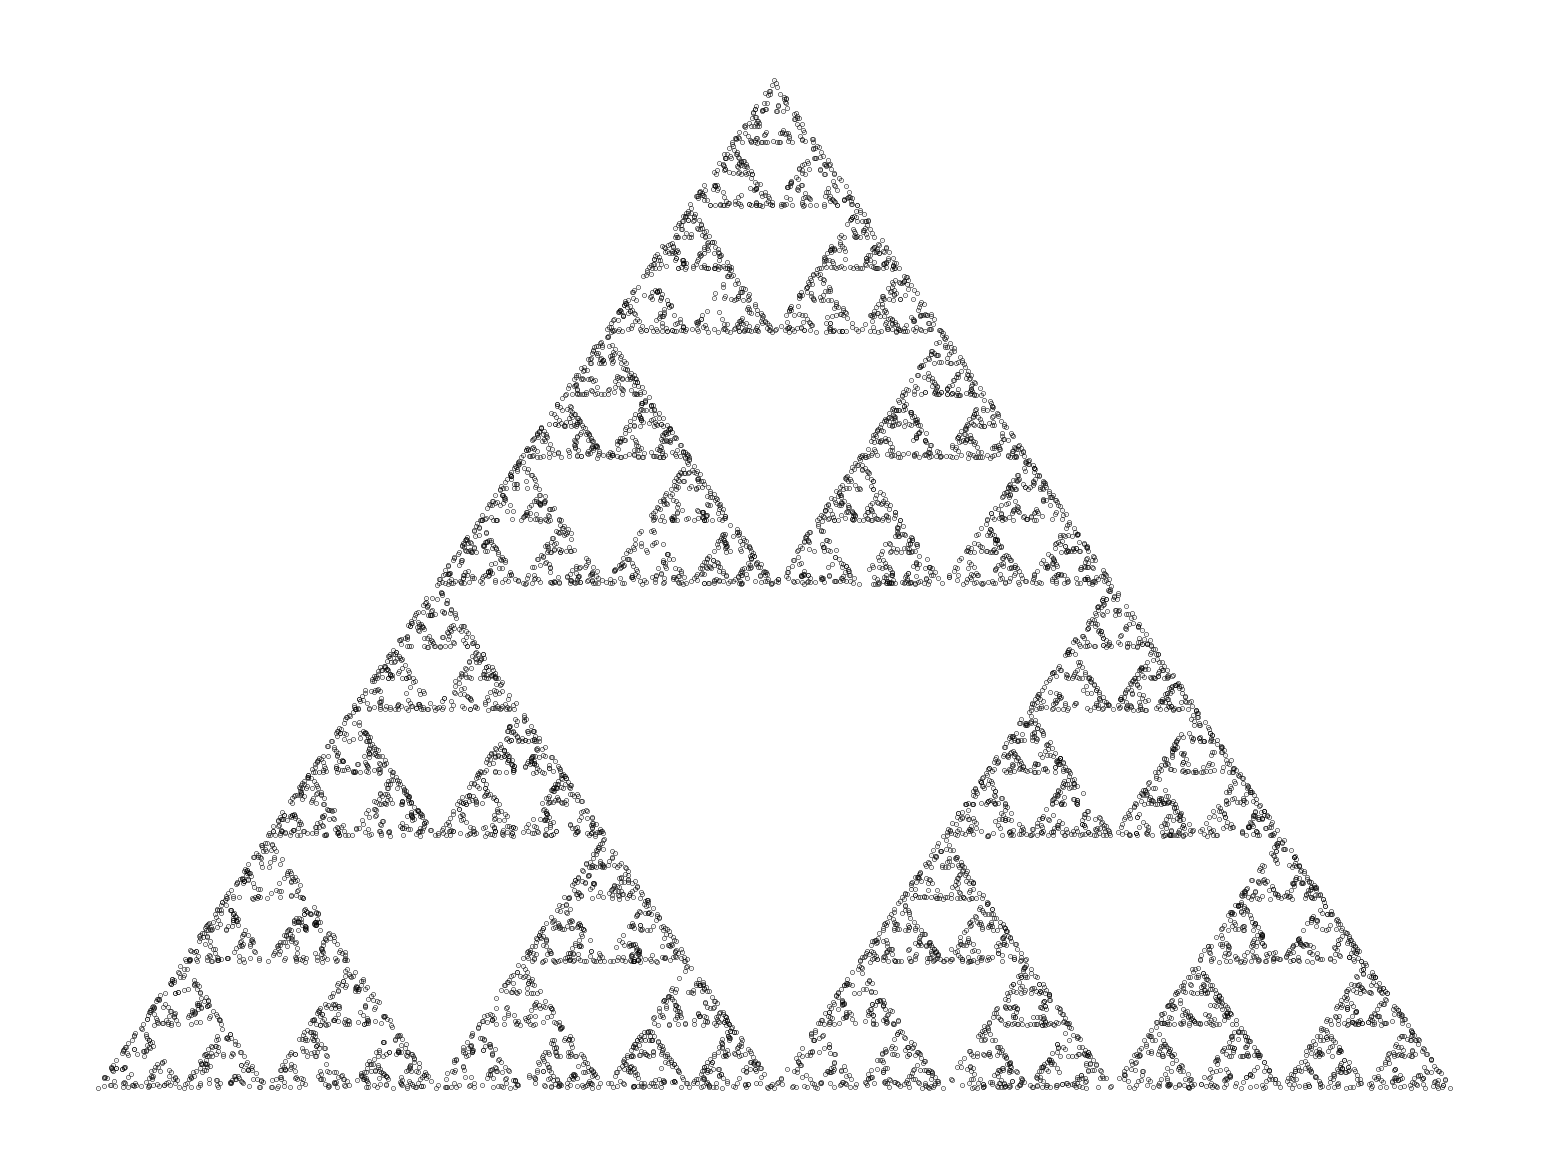

In [52]:
dt_temp = dt_add[0:10000]
df_temp = pd.DataFrame(dt_temp, columns = ['x', 'y'])
plt.rcParams['figure.dpi'] = 300
plt.scatter(df_temp.x, df_temp.y, s=0.06, c = 'black', marker='.')
plt.axis('off')
plt.show()

## 5. Variations of the intial rules: <br>
    The Sierpiński Gasket is the result of moving half of the way towards
    random point, however modifying this ratio or number of points will 
    create different and interesting results.

In [19]:
# modifying previously used code to be more flexible:

def triangles(r: int, c: int):
    # using same set of intial points and starting position
    dt_t = dt.copy()
    position = dt[0]

    # generating points
    for i in range(1,c):
        x = random.randint(0,2)
        goingto = dt[x]

        x = (goingto[0]+position[0])/r
        y = (goingto[1]+position[1])/r

        new_point = [x,y]
        position = [x,y]

        dt_t.append(new_point)
    
    print(dt_t)
    df_t = pd.DataFrame(dt_t, columns = ['x', 'y'])
    plt.scatter(df_t.x, df_t.y, s=0.1, c = 'black', marker='.')
    plt.axis('off')
    plt.show()

[[20, 20], [50, 20], [35.0, 45.98076211353316], [23.333333333333332, 13.333333333333334], [14.444444444444443, 11.111111111111112], [16.48148148148148, 19.03062440821476], [17.160493827160494, 21.670462173915976], [22.386831275720166, 13.890154057971992], [14.12894375857339, 11.296718019323997], [11.37631458619113, 10.432239339774666], [15.458771528730376, 18.804333817769276], [16.81959050957679, 21.595031977100813], [22.273196836525596, 13.865010659033606], [19.0910656121752, 19.948590924188924], [13.0303552040584, 13.31619697472964], [21.010118401352802, 11.105398991576548], [23.6700394671176, 10.368466330525516], [24.556679822372534, 10.122822110175171], [24.85222660745751, 10.040940703391724], [19.950742202485838, 18.673900938974963], [18.31691406749528, 21.551554350836042], [22.772304689165093, 13.850518116945347], [24.257434896388364, 11.283506038981782], [14.75247829879612, 10.427835346327262], [21.58415943293204, 10.142611782109087], [23.861386477644015, 10.047537260703029], [1

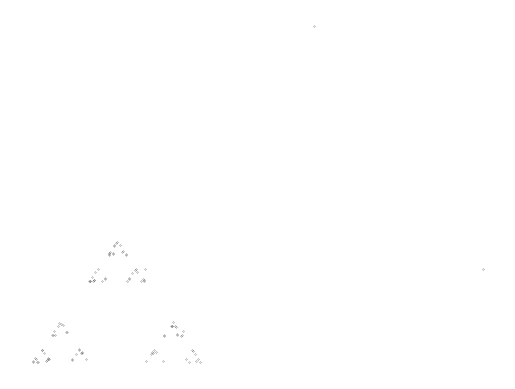

In [20]:
triangles(3, 100)

---------------------------------

In [21]:
# setting up generator to point us into the right direction (we don't want to
# end up going to the same point again)

# or do we....

def direction(points):
    previous_value = None
    while True:
        value = random.choice(points)
        if value != previous_value:
            yield value
            previous_value = value



d = direction([0,1,2])
for i in range(1):
    print(next(d))


1
